In [2]:
import pandas as pd

In [55]:
import matplotlib.pyplot as plt

# Filtro desertores sistema regular
Deserción del sistema regular: considera a los estudiantes que se salieron del sistema escolar de niños y jóvenes, aun cuando hayan continuado sus estudios en el sistema de adultos. De básica y media.

In [3]:
m2018 = pd.read_csv('data/matriculas/2018/m2018.csv', sep=';')
m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')

/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3969867569.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  m2018 = pd.read_csv('data/matriculas/2018/m2018.csv', sep=';')
/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3969867569.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  m2019 = pd.read_csv('data/matriculas/2019/m2019.csv', sep=';')


/var/folders/v5/8__wxdkj3j713bygpr1tsw_80000gn/T/ipykernel_41580/3563175573.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]


Sexo [2018] - [2019]


,Sexo,Cantidad A. Regulares,Porcentaje A. Regulares,Cantidad A. Desertores,Porcentaje A. Desertores
0,Sin información,3,0.000106,0,0.000000
1,Hombre,1442524,50.881981,45903,57.705507
2,Mujer,1392512,49.117913,33644,42.294493


Gráfico de torta: Sexo alumnos regulares [2018] - [2019]


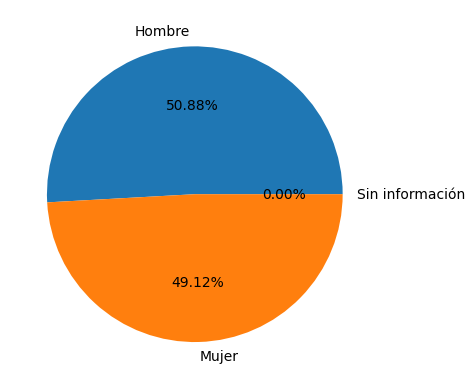

Gráfico de torta: Sexo alumnos desertores [2018] - [2019]


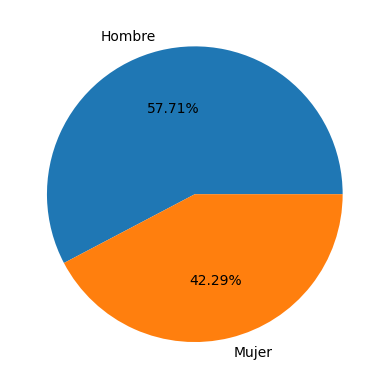

In [60]:


def identificar_desertores_sistema_regular(df_anterior, df_posterior):
    # Filtrar los estudiantes que no son prebásica o de educación para adultos
    desertores = df_anterior[(~df_anterior['COD_ENSE2'].isin([1, 3, 4, 6, 8]))]
    # print("Estudiantes regulares sin prebasica y adultos año anterior",desertores.shape)


    # Filtrar los estudiantes que no asisten a 4to medio el año a analizar
    desertores = desertores[~((desertores['COD_GRADO'] == 4) & (df_anterior['COD_ENSE2'].isin([5, 7])))]
    # print("Desertores sin 4to medio año anterior", desertores.shape)

    # Filtrar a los estudiantes df_posterior que no están en 'COD_ENSE2' 1, 3, 4, 6 y 8
    df_posterior = df_posterior[(~df_posterior['COD_ENSE2'].isin([1, 3, 4, 6, 8]))]
    # print("Estudiantes sistema regular año posterior",df_posterior.shape)

    # Verificar si los estudiantes están presentes en el archivo actual
    desertores = desertores[~desertores['MRUN'].isin(df_posterior['MRUN'].unique())]
    # print("Desertores año a analizar", desertores.shape)
    
    # Estudiantes que se mantienen en el sistema regular
    estudiantes_regulares = df_posterior[df_posterior['MRUN'].isin(df_anterior['MRUN'].unique())]
    # print("Estudiantes regulares año a analizar", estudiantes_regulares.shape)


    # Devolver el resultado como DataFrame de Pandas
    # desertores
    # Sexo DataFrame
    df_genero = pd.DataFrame()
    print('Sexo', df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())
    df_genero['Sexo'] = ['Sin información', 'Hombre', 'Mujer']
    df_genero['Cantidad A. Regulares'] = [((estudiantes_regulares['GEN_ALU'] == 0).sum()), 
                          ((estudiantes_regulares['GEN_ALU'] == 1).sum()), 
                          ((estudiantes_regulares['GEN_ALU'] == 2).sum())]
    df_genero['Porcentaje A. Regulares'] = [((estudiantes_regulares['GEN_ALU'] == 0).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['GEN_ALU'] == 1).sum()) / len(estudiantes_regulares) * 100,
                            ((estudiantes_regulares['GEN_ALU'] == 2).sum()) / len(estudiantes_regulares) * 100]
    df_genero['Cantidad A. Desertores'] = [((desertores['GEN_ALU'] == 0).sum()), 
                          ((desertores['GEN_ALU'] == 1).sum()), 
                          ((desertores['GEN_ALU'] == 2).sum())]
    df_genero['Porcentaje A. Desertores'] = [((desertores['GEN_ALU'] == 0).sum()) / len(desertores) * 100,
                            ((desertores['GEN_ALU'] == 1).sum()) / len(desertores) * 100,
                            ((desertores['GEN_ALU'] == 2).sum()) / len(desertores) * 100]
    
    display(df_genero)

    # Gráfico de torta
    data_pie = estudiantes_regulares["GEN_ALU"].value_counts()
    print("Gráfico de torta: Sexo alumnos regulares",df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Definir etiquetas
    labels = ['Hombre' if index == 1 else 'Mujer' if index == 2 else 'Sin información' for index in data_pie.index]

    plt.pie(data_pie, labels = labels, autopct = lambda x: f"{x:0.2f}%")
    plt.show()

    data_pie = desertores["GEN_ALU"].value_counts()
    print("Gráfico de torta: Sexo alumnos desertores",df_anterior['AGNO'].unique(),"-", df_posterior['AGNO'].unique())

    # Definir etiquetas
    labels = ['Hombre' if index == 1 else 'Mujer' if index == 2 else 'Sin información' for index in data_pie.index]

    plt.pie(data_pie, labels = labels, autopct = lambda x: f"{x:0.2f}%")
    plt.show()




identificar_desertores_sistema_regular(m2018, m2019)